<a href="https://colab.research.google.com/github/sahithinamala/MachineLearning/blob/main/HairColor_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install intel-tensorflow

     |████████████████████████████████| 177.8 MB 45 kB/s 


In [21]:
# from keras import backend as K 

In [3]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [4]:
# !pip install keras

In [5]:
!pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu

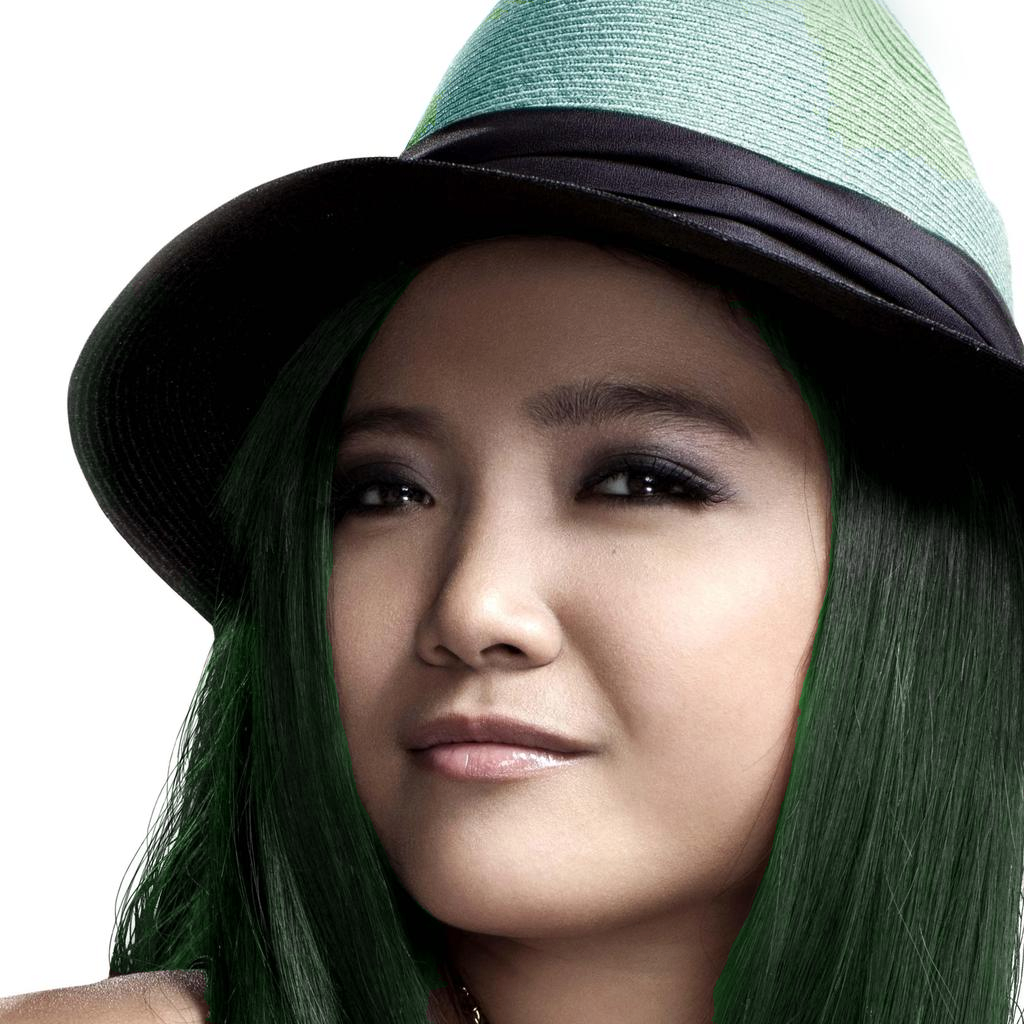

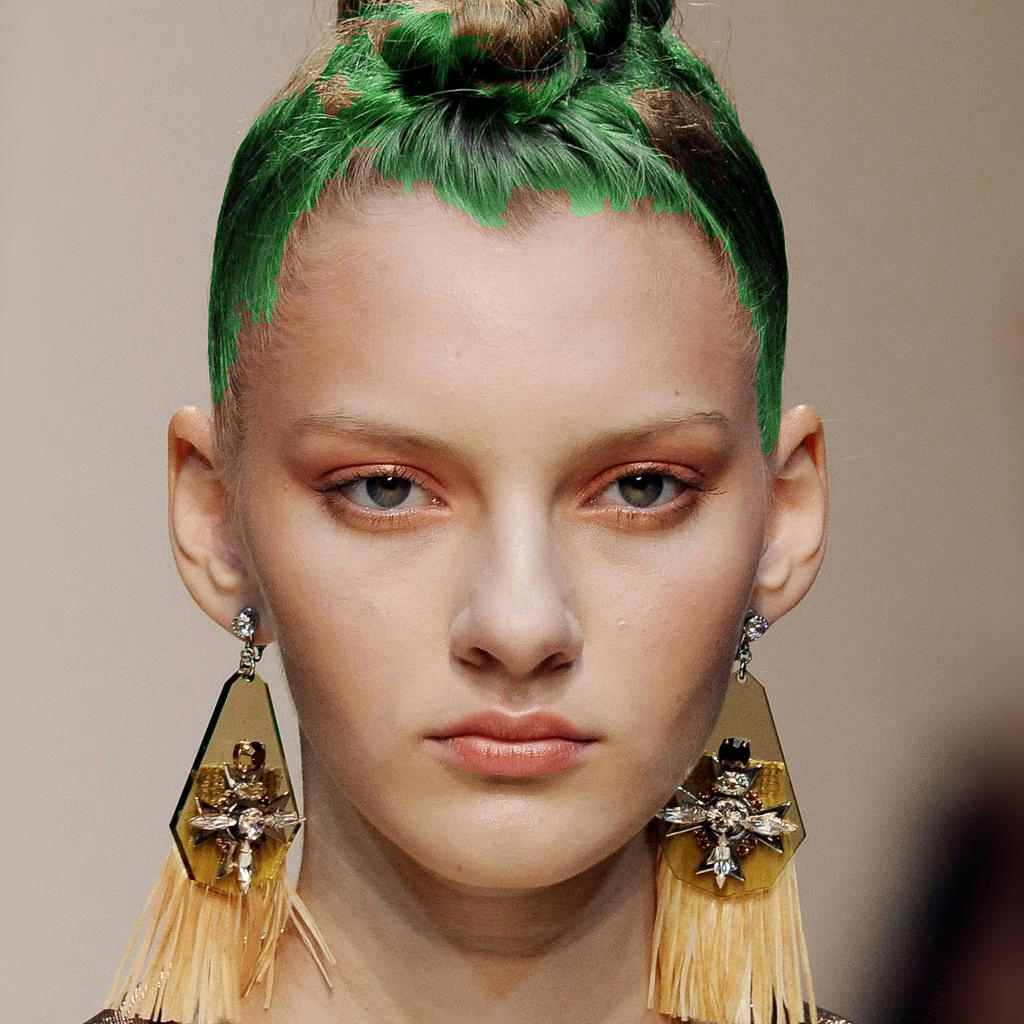

1.5600347518920898
Accuracy 0.7800173759460449


In [8]:
import matplotlib.pyplot as plt
import cv2
import glob
import time
from tensorflow import keras 
import tensorflow as tf
import numpy as np
import colorsys
import os
import torch
from google.colab.patches import cv2_imshow
dim = (1024,1024)
sum_a = 0.0
image_path = sorted(os.listdir('/content/drive/MyDrive/Test_Images/'))
mask_path = sorted(os.listdir("/content/drive/MyDrive/Test_Masks"))
for i in range(len(image_path)):
  man = cv2.cvtColor(cv2.imread(os.path.join('/content/drive/MyDrive/Test_Images/',image_path[i])),cv2.COLOR_BGR2RGB)
  # print("Man Shape",man.shape)
  imDlib2 = cv2.cvtColor(man,cv2.COLOR_BGR2RGB)
  choice = imDlib2
  # model = keras.models.load_model('/content/drive/MyDrive/hairnet_matting_30.hdf5')
  # model = tf.keras.models.load_model('/content/drive/MyDrive/model.h5')
  model = tf.keras.models.load_model('/content/drive/MyDrive/model_new1.pb')
  # model = tf.keras.models.load_model('/content/drive/MyDrive')
  
  def predict(man, height=1024, width=1024):
    im = man.copy()
    im = im / 255
    im = cv2.resize(im, (height, width))
    im = im.reshape((1,) + im.shape)
    image = tf.transpose(im,(0,3,1,2))
    pred = model.predict(image)
   
    mask = pred.copy()
    # print("mask shape:", mask.shape)
    mask = mask.reshape((1024, 1024,1))
    row, col, _ = man.shape
    mask = cv2.resize(mask, (col, row))
    return mask
  color = (0, 12, 0)

  img = choice.copy()
  hairmask = predict(img)
  threshold = 0.5
  bit8_hairmask = hairmask.copy()
  a = np.where(bit8_hairmask>0.5 , 255,0)
  bit8_hairmask[bit8_hairmask > threshold] = 255
  bit8_hairmask[bit8_hairmask <= threshold] = 0
  # print("out shape:",bit8_hairmask.shape )
  # print("hairmask shape:", hairmask.shape)
  bin_hairmask = bit8_hairmask.astype(np.bool)
  # print(bin_hairmask.shape)
  # plt.imshow(bin_hairmask)
  rgb_mask = bit8_hairmask.copy()
  rgb_mask = rgb_mask.astype(np.uint8)
  rgb_mask = rgb_mask[:,:,np.newaxis]
  # print("mask",rgb_mask.shape)
  rgb_mask = rgb_mask.repeat(3, axis = 2)
  r, g, b = color
  rgb_mask[:,:,0][bin_hairmask] = r
  rgb_mask[:,:,1][bin_hairmask] = g
  rgb_mask[:,:,2][bin_hairmask] = b
  # plt.imshow(rgb_mask)
  hls_mask = cv2.cvtColor(rgb_mask, cv2.COLOR_RGB2HLS)
  hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
  channel = 0
  h_mask, h_img = hls_mask[:,:, channel], hls_img[:,:, channel]

  h_img[bin_hairmask] = h_mask[bin_hairmask]

  rgb_img = cv2.cvtColor(hls_img, cv2.COLOR_HLS2RGB)

  cv2_imshow(rgb_img)
  
  img1 = rgb_img.astype(np.uint8)
  # cv2_imshow(img1)
  # cv2_imshow(a)
  # print(i)
  metric = tf.keras.metrics.Accuracy()
  metric.update_state(resized_img,a)
  sum_a =  sum_a + metric.result().numpy()
print(sum_a)
print("Accuracy",sum_a/len(image_path))
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1024, 1024)


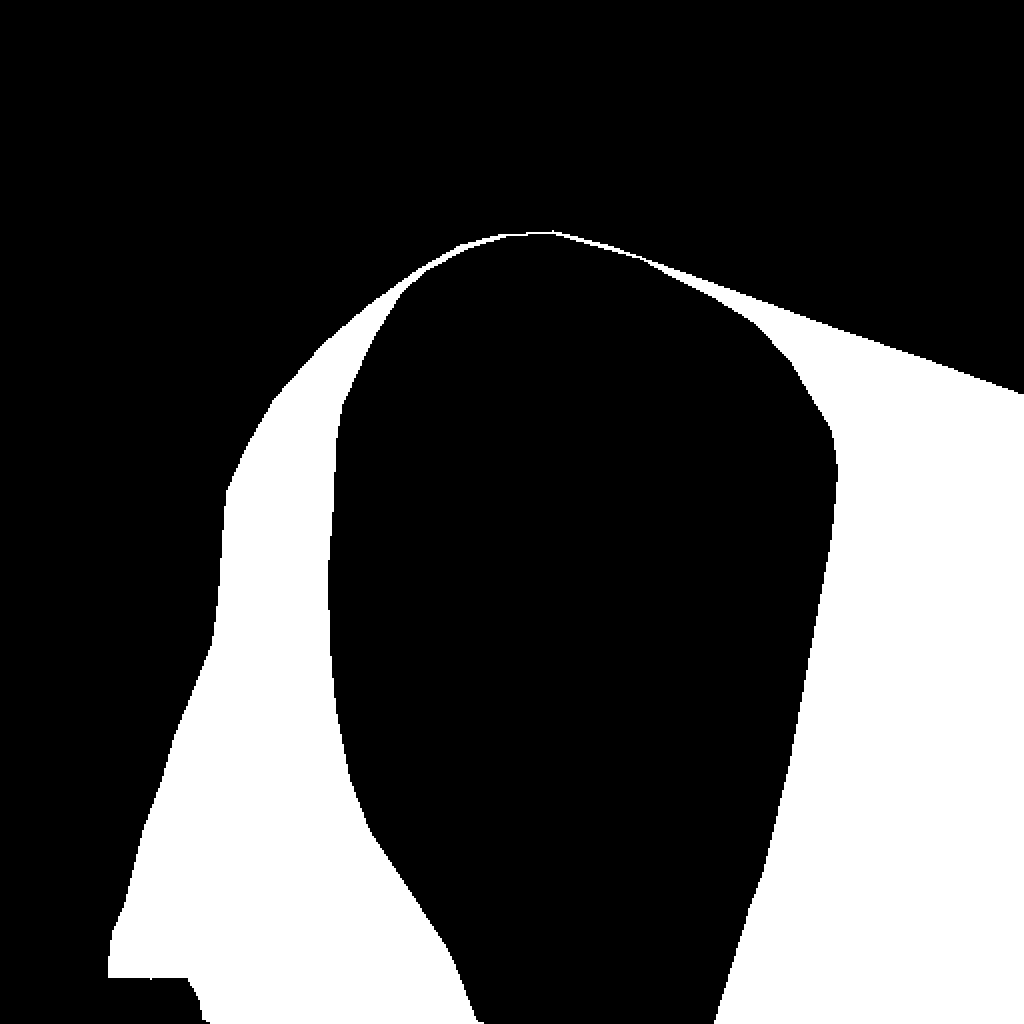

(1024, 1024)


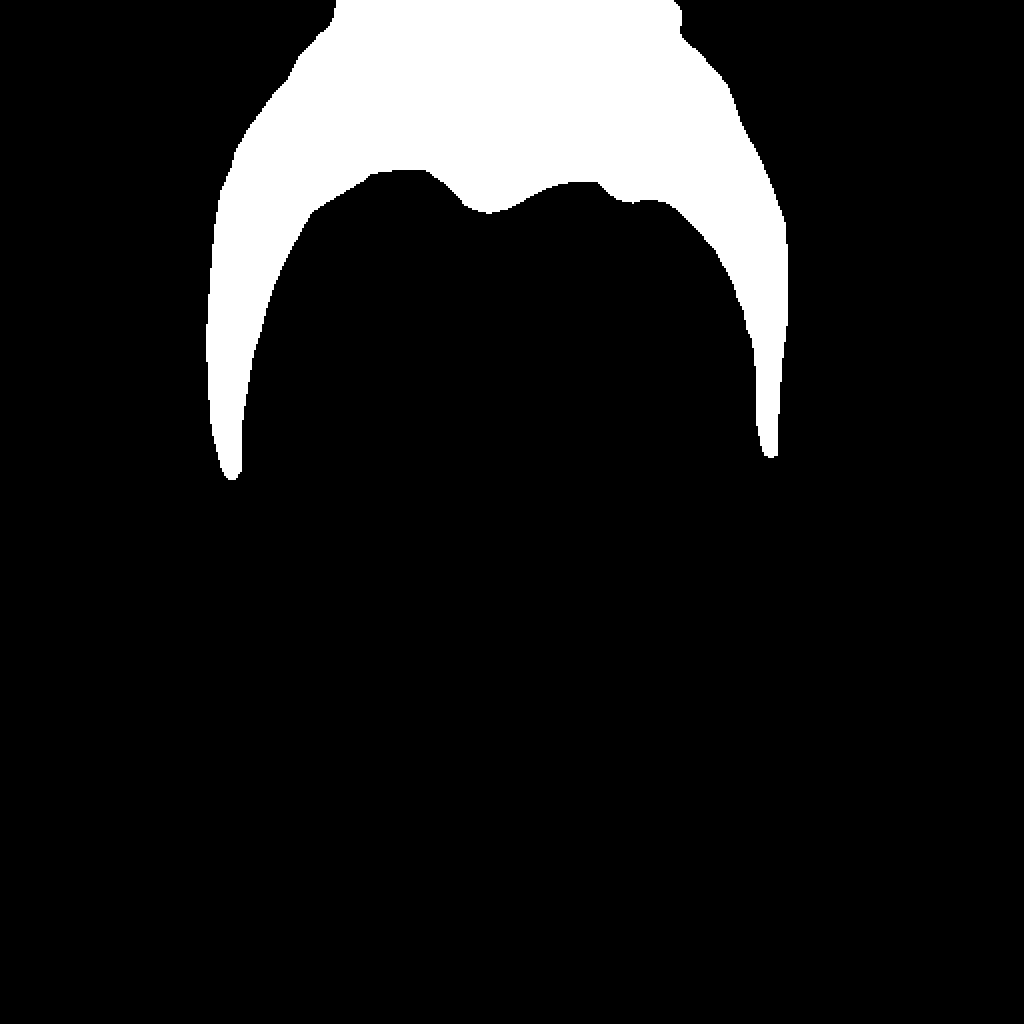

In [7]:
from sklearn.metrics import accuracy_score
for i in range(len(mask_path)):
  img_mask = cv2.cvtColor(cv2.imread(os.path.join('/content/drive/MyDrive/Test_Masks/',mask_path[i])), cv2.COLOR_BGR2GRAY)
  # cv2_imshow(img_mask)
  dim = (1024,1024)
  resized_img = cv2.resize(img_mask, dim, interpolation = cv2.INTER_AREA)
  print (resized_img.shape)
  resized_img = cv2.resize(img_mask, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(resized_img)
  